In [331]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [348]:
X=np.random.uniform(size=20)  #Generates numbers in uniformly between 0 and 1
N=np.random.normal(0,1,20)    #Generates numbers in normal distribution
Y=[]

for i in range(20):
    Y.append(np.sin(2*np.pi*X[i])+N[i])
Y=np.array(Y)
data=np.column_stack((X,Y))
print(data)

[[ 0.67196197 -2.01901902]
 [ 0.26829677  2.32860422]
 [ 0.4785189  -2.36646701]
 [ 0.52386347  0.09469445]
 [ 0.6520033   0.29145425]
 [ 0.47140996  1.61228893]
 [ 0.09102781  0.43462173]
 [ 0.58693818 -1.04867869]
 [ 0.5463935   0.64681565]
 [ 0.29925251  0.25932301]
 [ 0.21895199  0.33009366]
 [ 0.71902458 -0.98008358]
 [ 0.07002825  1.07734018]
 [ 0.42112783  2.09372422]
 [ 0.95222649 -1.64024865]
 [ 0.47677604 -1.9501425 ]
 [ 0.51413347  1.48660884]
 [ 0.05072139  2.34823678]
 [ 0.98394403 -0.2427154 ]
 [ 0.3760415  -0.27027116]]


In [349]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.5)


In [350]:
#We need to find the coefficients of the polynomial for degree=[0,1,6,9] 
degree=[0,1,6,9]
for i in range(len(degree)):
    print('The Weights of polynomial with the degree {} are \n {}\n'.format(degree[i],list(np.polyfit(x_train,y_train,degree[i]))))
    print("-"*100)

The Weights of polynomial with the degree 0 are 
 [0.17858106010656746]

----------------------------------------------------------------------------------------------------
The Weights of polynomial with the degree 1 are 
 [-3.6225916959015025, 1.7806420952648518]

----------------------------------------------------------------------------------------------------
The Weights of polynomial with the degree 6 are 
 [-8784.98965783247, 23683.203138357534, -23604.287542739203, 10571.377997979533, -2000.26167232633, 103.03219063405854, 0.9073547305819533]

----------------------------------------------------------------------------------------------------
The Weights of polynomial with the degree 9 are 
 [-3900728.706031675, 15379134.99975227, -25377028.032902464, 22755755.68533092, -12031179.93156342, 3802773.8756362186, -696539.9944071189, 69017.10365684425, -3420.3055105317376, 67.66783681965359]

------------------------------------------------------------------------------------------

In [351]:
#creating a Dataframe for the weights to display in a table fromat

weight_dict={'M0':list(np.polyfit(x_train,y_train,0)),
            'M1':list(np.polyfit(x_train,y_train,1)),'M6':list(np.polyfit(x_train,y_train,6)),'M9':list(np.polyfit(x_train,y_train,9))
            }

pd.DataFrame({key:pd.Series(value) for key,value in weight_dict.items()})


,M0,M1,M6,M9
0,0.178581,-3.622592,-8784.989658,-3.900729e+06
1,NaN,1.780642,23683.203138,1.537913e+07
2,NaN,NaN,-23604.287543,-2.537703e+07
3,NaN,NaN,10571.377998,2.275576e+07
4,NaN,NaN,-2000.261672,-1.203118e+07
5,NaN,NaN,103.032191,3.802774e+06
6,NaN,NaN,0.907355,-6.965400e+05
7,NaN,NaN,NaN,6.901710e+04
8,NaN,NaN,NaN,-3.420306e+03
9,NaN,NaN,NaN,6.766784e+01


In [352]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [353]:
x_train, y_train = zip(*sorted(zip(x_train, y_train)))



In [354]:
#Training the model with the training data that we have split and plotting the results

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


Graph for degree 0


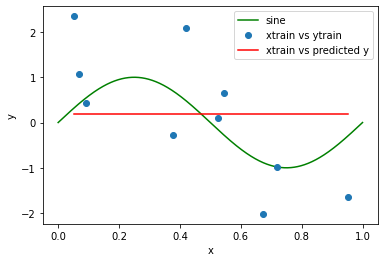

--------------------------------------------------
Graph for degree 1


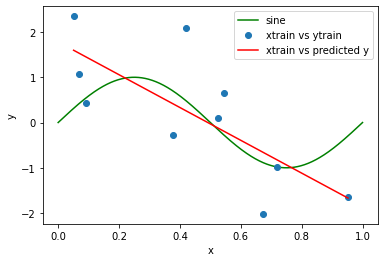

--------------------------------------------------
Graph for degree 3


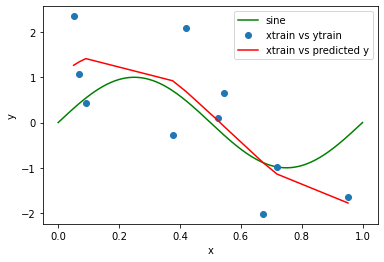

--------------------------------------------------
Graph for degree 6


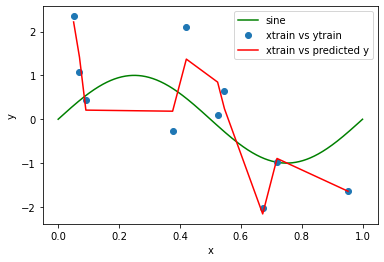

--------------------------------------------------
Graph for degree 9


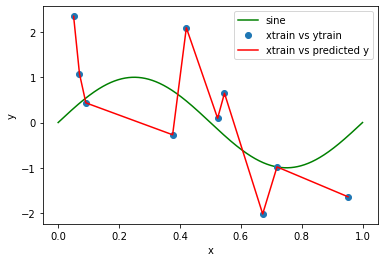

--------------------------------------------------


In [355]:
degree=[0,1,3,6,9]

for each_degree in degree:
    print('Graph for degree {}'.format(each_degree))
    polynomial_features=PolynomialFeatures(degree=each_degree)
    polyfeatures_x=polynomial_features.fit_transform(x_train)
    model=LinearRegression()
    model.fit(polyfeatures_x,y_train)
    x=np.linspace(0,1,1000)
    y=np.sin(2*np.pi*x)
    plt.plot(x,y,color='green',label='sine')
    plt.plot(x_train,y_train,'o',label='xtrain vs ytrain')
    plt.plot(x_train,model.predict(polyfeatures_x),color='red',label='xtrain vs predicted y')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    print("-"*50)
    

    
    

In [356]:
from sklearn.metrics import mean_squared_error

## Error Graph for Test and Train Data  

In [357]:

#Declaring the RMSE lists for train and test data.
rmse_train=[]
rmse_test=[]
for each_degree in range(10):
    #Generating the polynomial features for x_train and storing in polyfeatures_x
    polynomial_features=PolynomialFeatures(degree=each_degree) 
    polyfeatures_x=polynomial_features.fit_transform(x_train)
    model=LinearRegression() 
    model.fit(polyfeatures_x,y_train) #Fitting the polyfeatures_x data to the linear Regression model.
    
    #Calculating the RMSE of the predicted for x_train and y_train
    train_rmse=np.sqrt(mean_squared_error(y_train,model.predict(polyfeatures_x))) 
    rmse_train.append(train_rmse)
    polyfeatures_x=polynomial_features.fit_transform(x_test)
    
    #Calculating the RMSE of the predicted for x_test and the y_test
    test_rmse=np.sqrt(mean_squared_error(y_test,model.predict(polyfeatures_x)))
    rmse_test.append(test_rmse)
    

    
    
    
    
    
    
    
    

In [358]:
for i in range(len(rmse_train)):
    print('The RMSE of train data for degree {} is {}\n'.format(i,rmse_train[i]))

The RMSE of train data for degree 0 is 1.3840644608871557

The RMSE of train data for degree 1 is 0.9112453828039987

The RMSE of train data for degree 2 is 0.894599067097853

The RMSE of train data for degree 3 is 0.8673399727320851

The RMSE of train data for degree 4 is 0.6726408898846841

The RMSE of train data for degree 5 is 0.623215719447016

The RMSE of train data for degree 6 is 0.40853394585391933

The RMSE of train data for degree 7 is 0.39862903833502

The RMSE of train data for degree 8 is 0.34456860406211925

The RMSE of train data for degree 9 is 1.2996557807809094e-09



In [359]:
for i in range(len(rmse_test)):
    print('The RMSE of test data for degree {} is {}\n'.format(i,rmse_test[i]))

The RMSE of test data for degree 0 is 1.4533981229584458

The RMSE of test data for degree 1 is 1.457194846481009

The RMSE of test data for degree 2 is 1.527155528091099

The RMSE of test data for degree 3 is 1.5192133167506245

The RMSE of test data for degree 4 is 1.755977286460477

The RMSE of test data for degree 5 is 1.821406505625301

The RMSE of test data for degree 6 is 6.6126464980651845

The RMSE of test data for degree 7 is 4.97573443513594

The RMSE of test data for degree 8 is 17.158795389336184

The RMSE of test data for degree 9 is 350.91494026249677



## Plotting the Error Graph for train and test predicted values

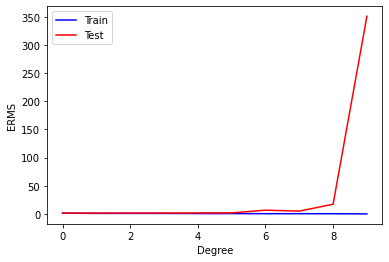

In [360]:
degree=[0,1,2,3,4,5,6,7,8,9]
plt.plot(degree,rmse_train,color='blue',label='Train')
plt.plot(degree,rmse_test,color='red',label='Test')
plt.xlabel('Degree')
plt.ylabel('ERMS')
plt.legend()

## Generating 100 more data 

In [361]:
X_new=np.random.uniform(size=100)  #Generates 100 numbers in uniform distribution between 0 and 1
N_new=np.random.normal(0,1,100)    #Generates 100 numbers in normal distribution between 0 and 1
Y_new=[]

for i in range(100):
    Y_new.append(np.sin(2*np.pi*X_new[i])+N_new[i])
Y_new=np.array(Y_new)



In [362]:

X_new=X_new.reshape(-1,1)
Y_new=Y_new.reshape(-1,1)


In [363]:
#Taking 15 samples from the 100 and fitting the 9th order equation.
X_15=X_new[:15].reshape(-1,1)
Y_15=Y_new[:15].reshape(-1,1)

In [364]:
X_15,Y_15 = zip(*sorted(zip(X_15, Y_15)))

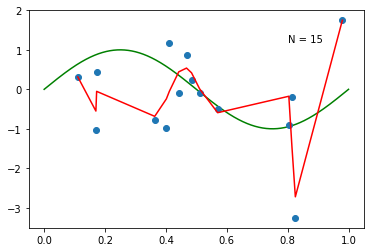

In [365]:
polynomial_features=PolynomialFeatures(degree=9)
polyfeatures_x=polynomial_features.fit_transform(X_15)
model=LinearRegression()
model.fit(polyfeatures_x,Y_15)
x=np.linspace(0,1,1000)
y=np.sin(2*np.pi*x)
plt.plot(x,y,color='green')
plt.plot(X_15,Y_15,'o')
plt.text(0.8,1.2,'N = 15')
plt.plot(X_15,model.predict(polyfeatures_x),color='red')


In [366]:
X_new,Y_new = zip(*sorted(zip(X_new, Y_new)))

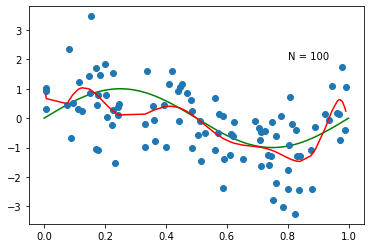

In [367]:
polynomial_features=PolynomialFeatures(degree=9)
polyfeatures_x=polynomial_features.fit_transform(X_new)
model=LinearRegression()
model.fit(polyfeatures_x,Y_new)
x=np.linspace(0,1,1000)
y=np.sin(2*np.pi*x)
plt.plot(x,y,color='green')
plt.plot(X_new,Y_new,'o')
plt.text(0.8,2,'N = 100')
plt.plot(X_new,model.predict(polyfeatures_x),color='red')

## Regularizing using sum of weights

In [368]:
# We will be using ridge regression
lambda_values=[1,1/10,1/100,1/1000,1/10000,1/100000]



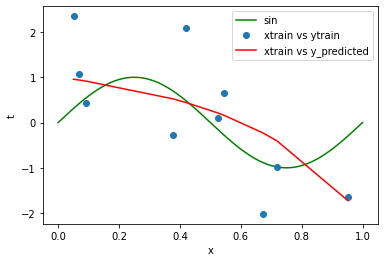

------------------------------------------------------------


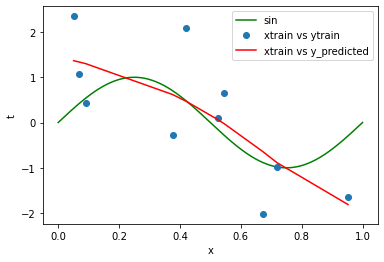

------------------------------------------------------------


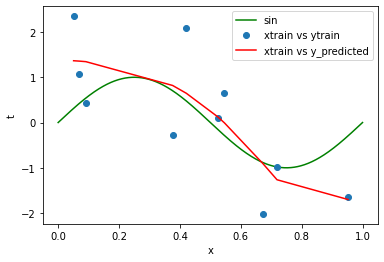

------------------------------------------------------------


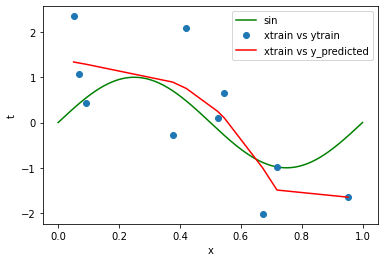

------------------------------------------------------------


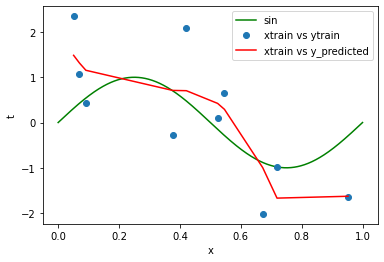

------------------------------------------------------------


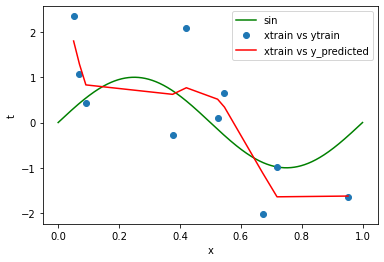

------------------------------------------------------------


In [369]:
from sklearn.linear_model import Ridge
#Declaring the RMSE lists for train and test data.
rmse_train_lambda=[]
rmse_test_lambda=[]
for lambda_value in lambda_values:
    
    #Generating the polynomial features for x_train and storing in polyfeatures_x
    polynomial_features=PolynomialFeatures(degree=9) 
    polyfeatures_x=polynomial_features.fit_transform(x_train)
    polynomial_features.fit(polyfeatures_x,y_train)
    model=Ridge(alpha=lambda_value) # intializing the ridge model
    
    model.fit(polyfeatures_x,y_train) #Fitting the polyfeatures_x data to the linear Regression model.
    
    x=np.linspace(0,1,1000)
    y=np.sin(2*np.pi*x)
    plt.plot(x,y,color='green',label='sin')
    plt.plot(x_train,y_train,'o',label='xtrain vs ytrain')
    plt.plot(x_train,model.predict(polyfeatures_x),color='red',label='xtrain vs y_predicted')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.legend()
    plt.show()
    print('-'*60)
    
    
    


    
    
    
    
    
    
    
    

In [370]:
train_rmse_lambda=[]
test_rmse_lambda=[]
for lambda_value in lambda_values:
    polynomial_features=PolynomialFeatures(degree=9) 
    polyfeatures_x=polynomial_features.fit_transform(x_train)
    polynomial_features.fit(polyfeatures_x,y_train)
    model=Ridge(alpha=lambda_value) # intializing the ridge model
    
    model.fit(polyfeatures_x,y_train) #Fitting the polyfeatures_x data to the linear Regression model.
    
    #Calculating the RMSE of the predicted for x_train and y_train
    rmse_train=np.sqrt(mean_squared_error(y_train,model.predict(polyfeatures_x))) 
    train_rmse_lambda.append(rmse_train)
    
    #Calculating the RMSE of the predicted for x_test and the y_test
    polyfeatures_x=polynomial_features.fit_transform(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,model.predict(polyfeatures_x)))
    test_rmse_lambda.append(rmse_test)
print(train_rmse_lambda)
print(test_rmse_lambda)

[0.9673061351445259, 0.8725736686399481, 0.8317518520260915, 0.8111948791250577, 0.7727232634519311, 0.6767656832544567]
[1.5172213838676096, 1.4846060351086163, 1.4715322374388844, 1.4757784776549887, 1.5049487187801995, 1.7234373006349786]


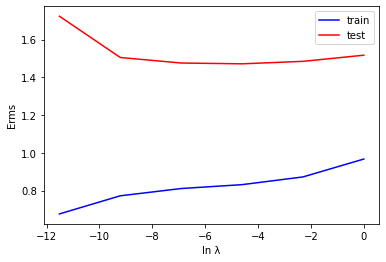

In [371]:
plt.plot(np.log(lambda_values),train_rmse_lambda,color='blue',label='train')
plt.plot(np.log(lambda_values),test_rmse_lambda,color='red',label='test')
plt.xlabel('ln λ')
plt.ylabel('Erms')
plt.legend()


## Selecting a model based on best performace

# The model is selected based on the best performance of the test data set the The model perofrms best when degree is 2 or 3